<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Genetic-Algorithm" data-toc-modified-id="Genetic-Algorithm-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Genetic Algorithm</a></span><ul class="toc-item"><li><span><a href="#Libraries" data-toc-modified-id="Libraries-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Libraries</a></span></li><li><span><a href="#Parameters-and-Variables" data-toc-modified-id="Parameters-and-Variables-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Parameters and Variables</a></span></li><li><span><a href="#Perfect-Information" data-toc-modified-id="Perfect-Information-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Perfect Information</a></span><ul class="toc-item"><li><span><a href="#Simulation" data-toc-modified-id="Simulation-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Simulation</a></span><ul class="toc-item"><li><span><a href="#By-risk-aversion" data-toc-modified-id="By-risk-aversion-1.3.1.1"><span class="toc-item-num">1.3.1.1&nbsp;&nbsp;</span>By risk aversion</a></span></li><li><span><a href="#By-crossover-and-mutation" data-toc-modified-id="By-crossover-and-mutation-1.3.1.2"><span class="toc-item-num">1.3.1.2&nbsp;&nbsp;</span>By crossover and mutation</a></span></li><li><span><a href="#By-initial-points" data-toc-modified-id="By-initial-points-1.3.1.3"><span class="toc-item-num">1.3.1.3&nbsp;&nbsp;</span>By initial points</a></span></li></ul></li><li><span><a href="#Ploting" data-toc-modified-id="Ploting-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>Ploting</a></span><ul class="toc-item"><li><span><a href="#Parameters" data-toc-modified-id="Parameters-1.3.2.1"><span class="toc-item-num">1.3.2.1&nbsp;&nbsp;</span>Parameters</a></span></li><li><span><a href="#Specific-Simulation" data-toc-modified-id="Specific-Simulation-1.3.2.2"><span class="toc-item-num">1.3.2.2&nbsp;&nbsp;</span>Specific Simulation</a></span></li></ul></li></ul></li><li><span><a href="#Imperfect-Information" data-toc-modified-id="Imperfect-Information-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Imperfect Information</a></span><ul class="toc-item"><li><span><a href="#Parameters,-Variables-and-Methods" data-toc-modified-id="Parameters,-Variables-and-Methods-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>Parameters, Variables and Methods</a></span></li><li><span><a href="#Simulation" data-toc-modified-id="Simulation-1.4.2"><span class="toc-item-num">1.4.2&nbsp;&nbsp;</span>Simulation</a></span><ul class="toc-item"><li><span><a href="#By-risk-aversion" data-toc-modified-id="By-risk-aversion-1.4.2.1"><span class="toc-item-num">1.4.2.1&nbsp;&nbsp;</span>By risk aversion</a></span></li><li><span><a href="#By-crossover-and-Mutation" data-toc-modified-id="By-crossover-and-Mutation-1.4.2.2"><span class="toc-item-num">1.4.2.2&nbsp;&nbsp;</span>By crossover and Mutation</a></span></li><li><span><a href="#By-initial-Points" data-toc-modified-id="By-initial-Points-1.4.2.3"><span class="toc-item-num">1.4.2.3&nbsp;&nbsp;</span>By initial Points</a></span></li></ul></li><li><span><a href="#Ploting" data-toc-modified-id="Ploting-1.4.3"><span class="toc-item-num">1.4.3&nbsp;&nbsp;</span>Ploting</a></span><ul class="toc-item"><li><span><a href="#Parameters" data-toc-modified-id="Parameters-1.4.3.1"><span class="toc-item-num">1.4.3.1&nbsp;&nbsp;</span>Parameters</a></span></li><li><span><a href="#Specific-simulation" data-toc-modified-id="Specific-simulation-1.4.3.2"><span class="toc-item-num">1.4.3.2&nbsp;&nbsp;</span>Specific simulation</a></span></li></ul></li></ul></li><li><span><a href="#Ploting-Both-Models" data-toc-modified-id="Ploting-Both-Models-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Ploting Both Models</a></span></li></ul></li></ul></div>

# Genetic Algorithm 

## Libraries

In [2]:
# Importing libriries

#from random import Random
from time import time
import inspyred
import math
#from datetime import datetime
import pandas as pd
import numpy as np
import os
from matplotlib.ticker import ScalarFormatter, AutoMinorLocator
import matplotlib as mpl
import matplotlib.pyplot as plt
from numpy import random
from scipy.optimize import fsolve
import uuid #unique id
import sys


# this code is to enable the jupyter black theme:
#from jupyterthemes import jtplot
#jtplot.style( context='notebook',grid=False, ticks =True, fscale =1)

#nice graphs in jupyter:
%matplotlib notebook  


## Parameters and Variables

In [3]:
#importing our .py's files, in particular, global  constant variables. 
from src.params import limit, YH, YL, n_inputs


In [7]:

#########################################################################################
# starting points 

# temporal database
db_sims = pd.DataFrame([], columns = [] ) 

#fixed initial points
fix_1 = [[x,1-x] for x in np.arange(0, 1.1, 0.1)]
fix_2 = [[0,2],[0.2,1.8],[0.4,1.6],[0.6,1.4],[0.8,1.2] ,[1,1],[1.2,0.8],[1.4,0.6],[1.6,0.4],[1.8,0.2],[2,0]]

# these points are taken along the Pareto frontier of a final iteration, with cara=0.5
# perfect information = [[wage, effort],...]
fix_per = [[2.139879,0.289246],[2.477386,0.274471],[1.933405,0.375377],[1.64322,0.416202],[1.361385,0.538513],
          [1.143557,0.614495],[0.89272,0.72385],[0.709991,0.811314],[0.596134,1.003939],[0.369252,1.214565]]
# imperfect information = [[low wage, high wage],...]
fix_imp = [[2.0,4.0],[1.483575,3.318113],[1.207703,3.143002],[0.953215,2.780622],[0.846049,2.584232],
          [0.580762,2.264117],[0.414088,1.98788],[0.169402,1.619359],[0.064209,1.363026],[0.0,0.785495]]
# these points are random
fix_per_random = [[random.uniform(0.0,YL),random.uniform(0.0,YH)] for x in range(100)]
fix_imp_random = [[random.uniform(0.0,YH),random.uniform(0.0,2)] for x in range(100)]


# fonts' size
SMALLER_SIZE = 7
SMALL_SIZE = 10
MEDIUM_SIZE = 12
BIGGER_SIZE = 15

# font style
plt.rcParams["font.family"] = "Times New Roman"


## Perfect Information

In [8]:
# importing perfect information methods and variables
import src.perfectga as pe

### Simulation


#### By risk aversion

In [ ]:
#list of cara values to simulate with current parameters
risk_averse_list = [ 0.3, 0.5]
#risk_averse_list = [ 0.10, 0.30, 0.70, 0.90]


# params
pe.max_gen = 1000
pe.init_pop_random = False
pe.init_pop_size = 10
pe.crossover = 0.8
pe.mutation = 0.1

# arguments from simulate
args = []

# code for extracting an old simulation to use as seed
name_seed = 'static_perf_1000_h0.3_cro_0.8_mut_0.05_key_3679063'
data = pd.read_csv('./data/{}.csv'.format(name_seed))
data = data[['wage', 'effort']]
seeds = data.to_numpy().tolist()

### simulating for each element of risk_averse_list
for cara in risk_averse_list:
    print("***************new simulation******************")
    # setting variables for current simulation
    pe.h = cara

    # reset seeding
    pe.reset_seeding(fix_per) #fix_per #seeds
    # reinit database and variables
    pe.reinit_variables_perf(pe.h)
    # simulating with global parameters using the perfect information model
    db_sims, args, df_hyp= pe.simulate_perf()
    


In [ ]:
db_sims.head()

#### By crossover and mutation

In [13]:
# Simulations per crossover and mutation

# list of crossover indexes
cross_list = [0.4,0.6,0.8,1.0]
#cross_list = [0.4]

# list of mutation indexes
muts_list=[0.001,0.025,0.005,0.01,0.05,0.1,0.15,0.2,0.075,0.25,0.3]
muts_list=[0.001,0.005,0.01,0.05,0.1,0.15,0.2,0.25,0.3]
#muts_list= [0.075,0.25,0.3]

# assign risk aversion coefficient
pe.h = 0.5

# other paramteres 
pe.max_gen = 1000

# arguments from simulate
args = []
         
# data frame of crossover and mutations
name_cr_mu_df = 'static_perf_cross_mut_'+str(pe.max_gen)+'_h'+str(pe.h)+'_10_2_2021_refNone'
cols_cr_mut = ['sim','cross', 'mut', 'final_pop','hv']
db_cr_mut = pd.DataFrame([], columns = cols_cr_mut ).set_index('sim') 

#Or retriving to add simulations
try:
    db_cr_mut = pd.read_csv('./data/{}.csv'.format(name_cr_mu_df))#.set_index('sim')
    db_cr_mut.drop('Unnamed: 0', axis=1, inplace=True)
except:
    print("Impossible to retrieve {}.cvc".format(name_cr_mu_df))

len(db_cr_mut)     

Impossible to retrieve static_perf_cross_mut_1000_h0.5_10_2_2021_refNone.cvc


0

In [14]:
def sim_mult_cross_mut():# loop over crossover and mutation indexes
    for cr in cross_list:
        for mu in muts_list:
            cross_mut_proc(cr,mu)
            
def cross_mut_proc(cr,mu):
    # assigning values to global variables of crossover and mutation
    pe.crossover = cr
    pe.mutation = mu

    #print("***************new simulation******************")
    print("*****","crossover: ", pe.crossover,"mutation: ",pe.mutation,"*****")
    #print("***************new simulation******************")

    # setting variables for current simulation
    # reset seeding
    pe.reset_seeding(fix_per)
    # reinit database and variables
    pe.reinit_variables_perf()

    # simulate
    db_sims, args, df_hyp= pe.simulate_perf()

    #adding result of simulation to cross and mut data frame
    hv_ = df_hyp['indicator'].loc[max(df_hyp.index)]
    final_pop_ = len(db_sims[db_sims['gen']==pe.max_gen])
    new_row = {'sim':db_sims.index[0], 'cross':cr, 'mut':mu, 'final_pop':final_pop_,'hv': hv_}
    #append row to the dataframe
    global db_cr_mut
    db_cr_mut = db_cr_mut.append(new_row, ignore_index=True)

     # saving database of crossover and mutation
    db_cr_mut.to_csv('./data/{}.csv'.format(name_cr_mu_df))
    #print("*", new_row,"*")
    
# Adding  simulations to our database, a total of (cross*mut)*loops            
loops = 6
for i in range(loops):
    print("%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%")
    print("****************************** loop ", i, "**************************")
    sim_mult_cross_mut()

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
****************************** loop  0 **************************
***** crossover:  0.4 mutation:  0.001 *****
----------population in final arc 608, with h = 0.5----------
archive name:  static_perf_1000_h0.5_cro_0.4_mut_0.001_key_f7f5378
***** crossover:  0.4 mutation:  0.005 *****
----------population in final arc 392, with h = 0.5----------
archive name:  static_perf_1000_h0.5_cro_0.4_mut_0.005_key_bc803e3
***** crossover:  0.4 mutation:  0.01 *****
----------population in final arc 478, with h = 0.5----------
archive name:  static_perf_1000_h0.5_cro_0.4_mut_0.01_key_ebd892e
***** crossover:  0.4 mutation:  0.05 *****
----------population in final arc 697, with h = 0.5----------
archive name:  static_perf_1000_h0.5_cro_0.4_mut_0.05_key_f5abdee
***** crossover:  0.4 mutation:  0.1 *****
----------population in final arc 594, with h = 0.5----------
archive name:  static_perf_1000_h0.5_cro_0.4_mut_0.1_key_3aa9187
*

***** crossover:  0.6 mutation:  0.005 *****
----------population in final arc 1587, with h = 0.5----------
archive name:  static_perf_1000_h0.5_cro_0.6_mut_0.005_key_4d495a0
***** crossover:  0.6 mutation:  0.01 *****
----------population in final arc 1018, with h = 0.5----------
archive name:  static_perf_1000_h0.5_cro_0.6_mut_0.01_key_b82896c
***** crossover:  0.6 mutation:  0.05 *****
----------population in final arc 1045, with h = 0.5----------
archive name:  static_perf_1000_h0.5_cro_0.6_mut_0.05_key_6b8279a
***** crossover:  0.6 mutation:  0.1 *****
----------population in final arc 860, with h = 0.5----------
archive name:  static_perf_1000_h0.5_cro_0.6_mut_0.1_key_ec8304c
***** crossover:  0.6 mutation:  0.15 *****
----------population in final arc 725, with h = 0.5----------
archive name:  static_perf_1000_h0.5_cro_0.6_mut_0.15_key_ec326e1
***** crossover:  0.6 mutation:  0.2 *****
----------population in final arc 635, with h = 0.5----------
archive name:  static_perf_1000_

----------population in final arc 1153, with h = 0.5----------
archive name:  static_perf_1000_h0.5_cro_0.8_mut_0.05_key_c7183e3
***** crossover:  0.8 mutation:  0.1 *****
----------population in final arc 1014, with h = 0.5----------
archive name:  static_perf_1000_h0.5_cro_0.8_mut_0.1_key_3fd9806
***** crossover:  0.8 mutation:  0.15 *****
----------population in final arc 856, with h = 0.5----------
archive name:  static_perf_1000_h0.5_cro_0.8_mut_0.15_key_fe45e65
***** crossover:  0.8 mutation:  0.2 *****
----------population in final arc 740, with h = 0.5----------
archive name:  static_perf_1000_h0.5_cro_0.8_mut_0.2_key_ed4490d
***** crossover:  0.8 mutation:  0.25 *****
----------population in final arc 777, with h = 0.5----------
archive name:  static_perf_1000_h0.5_cro_0.8_mut_0.25_key_daf6c17
***** crossover:  0.8 mutation:  0.3 *****
----------population in final arc 597, with h = 0.5----------
archive name:  static_perf_1000_h0.5_cro_0.8_mut_0.3_key_95a2558
***** crossover:

----------population in final arc 831, with h = 0.5----------
archive name:  static_perf_1000_h0.5_cro_1.0_mut_0.15_key_8e9106d
***** crossover:  1.0 mutation:  0.2 *****
----------population in final arc 777, with h = 0.5----------
archive name:  static_perf_1000_h0.5_cro_1.0_mut_0.2_key_59ce771
***** crossover:  1.0 mutation:  0.25 *****
----------population in final arc 739, with h = 0.5----------
archive name:  static_perf_1000_h0.5_cro_1.0_mut_0.25_key_4923e39
***** crossover:  1.0 mutation:  0.3 *****
----------population in final arc 669, with h = 0.5----------
archive name:  static_perf_1000_h0.5_cro_1.0_mut_0.3_key_33c0b00
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
****************************** loop  4 **************************
***** crossover:  0.4 mutation:  0.001 *****
----------population in final arc 293, with h = 0.5----------
archive name:  static_perf_1000_h0.5_cro_0.4_mut_0.001_key_25172c0
***** crossover:  0.4 mutation:  0.005 *****
----

----------population in final arc 549, with h = 0.5----------
archive name:  static_perf_1000_h0.5_cro_0.4_mut_0.25_key_836766a
***** crossover:  0.4 mutation:  0.3 *****
----------population in final arc 498, with h = 0.5----------
archive name:  static_perf_1000_h0.5_cro_0.4_mut_0.3_key_6a2fa02
***** crossover:  0.6 mutation:  0.001 *****
----------population in final arc 581, with h = 0.5----------
archive name:  static_perf_1000_h0.5_cro_0.6_mut_0.001_key_8c25ec9
***** crossover:  0.6 mutation:  0.005 *****
----------population in final arc 894, with h = 0.5----------
archive name:  static_perf_1000_h0.5_cro_0.6_mut_0.005_key_39533fb
***** crossover:  0.6 mutation:  0.01 *****
----------population in final arc 1525, with h = 0.5----------
archive name:  static_perf_1000_h0.5_cro_0.6_mut_0.01_key_f0354b2
***** crossover:  0.6 mutation:  0.05 *****
----------population in final arc 1026, with h = 0.5----------
archive name:  static_perf_1000_h0.5_cro_0.6_mut_0.05_key_0ffc84a
***** cr

In [16]:
len(db_cr_mut)
#db_cr_mut

216

#### By initial points

In [ ]:
# Simulations per initial points

# number of simulations
tot_sim = 2

# setting parameters
pe.crossover = 1
pe.mutation = 0.2
pe.max_gen =1000
# pe.max_gen =10000
pe.init_pop_size = 50
pe.init_pop_random = True

# assign risk averse coefficient
pe.h = 0.5
# arguments from simulate
args = []
         
# data frame of crossover and mutations
name_cr_mu_df = 'static_perf_cross_'+str(pe.crossover)+'_mut_'+str(pe.mutation)+'_rd_pop_'+str(pe.max_gen)+'_h'+str(pe.h)+'_8jul'
cols_cr_mut = ['sim','cross', 'mut', 'final_pop','hv']
db_cr_mut = pd.DataFrame([], columns = cols_cr_mut ).set_index('sim') 

In [ ]:


# loops over number of simulations
for x in range(tot_sim):        
    print("***************new simulation******************")

    # setting variables for current simulation
    # reset seeding
    pe.reset_seeding(fix_per)
    # reinit database and variables
    pe.reinit_variables_perf()

    # simulate
    db_sims, args, df_hyp= pe.simulate_perf()

    #adding result of simulation to cross and mut data frame
    hv_ = df_hyp['indicator'].loc[max(df_hyp.index)]
    final_pop_ = len(db_sims[db_sims['gen']==pe.max_gen])
    new_row = {'sim':db_sims.index[0], 'cross':pe.crossover, 'mut':pe.mutation,
               'final_pop':final_pop_,'hv': hv_}
    #append row to the dataframe
    db_cr_mut = db_cr_mut.append(new_row, ignore_index=True)

     # saving database of crossover and mutation
    db_cr_mut.to_csv('./data/{}.csv'.format(name_cr_mu_df))
         

In [ ]:
db_cr_mut

### Ploting

#### Parameters

In [60]:
# Creating a database and loading from disc, 
# run this cell each time you reopen the jupyter notebook
# If there's no database with that name, it will create a new dataframe. 
# After the first simulation will be store. 

name_params = './data/static_perf_cross_mut_'+str(10000)+'_h50_27_jun'
name_params = './data/static_perf_cross_mut_10000_h50_25_jun'

#name_params = './data/' +name_cr_mu_df  #last simulation
name_params = './data/static_perf_cross_mut_'+str(pe.max_gen)+'_h'+str(pe.h)+'_10_2_2021'
try:
    db_params = pd.read_csv('{}.csv'.format(name_params))#.set_index('sim')
except:
    print("Impossible to retrieve {}.cvc".format(name_params))
    
   
# Cleaning dataframe, changing index,changing columns name in case they are wrong
#db_sims_pi.rename(columns= {'Unnamed: 0':'sim',inplace=True)
#db_sims.set_index('sim',inplace= True)
db_params.drop(columns=['Unnamed: 0'],inplace=True)
db_params.sort_values(by=["cross","mut"],ascending=True,inplace=True)

# list of crossover indexes
cross_list = list(db_params['cross'].unique())

muts_list = list(db_params['mut'].unique())

#printing head of dataframe,checking if everything is ok
db_params[db_params['mut']==0.001]

,cross,mut,final_pop,hv,sim
3,0.4,0.001,1306,4.758938,c8773237-84ad-41c1-b8fb-310e46945242
36,0.4,0.001,1296,4.730170,5413bbd3-2dd2-4bff-bf15-d566a4bee303
44,0.4,0.001,603,4.673234,e87c7c4b-6310-4690-8e9d-ab66170cb62d
76,0.4,0.001,971,4.736283,95ce7734-152c-4264-99d5-d8c03dfa2c4a
108,0.4,0.001,1417,4.649362,f2a62383-d580-466f-babc-aec913e66738
140,0.4,0.001,207,4.651361,eca5f65d-7688-4706-9cfb-ec56f3f68670
172,0.4,0.001,653,4.717763,4f89fad9-d55d-4eec-94bc-9b4f78f28929
204,0.4,0.001,1106,4.643506,8204b5e4-805f-4922-8fe4-3b700327d290
365,0.4,0.001,1744,4.607560,b6387dac-cfa7-4bd2-93fa-559fed77eccb
11,0.6,0.001,3273,4.774134,7e35c623-0c2b-4396-bc60-0de6951bb58b


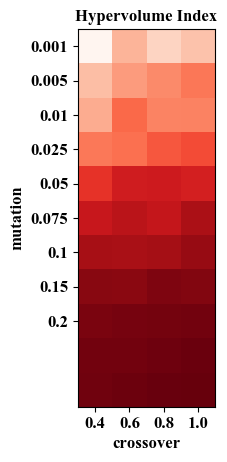

In [61]:
# hypervolume

%matplotlib inline

weight = 4
height = 5
density = 100

plt.figure(figsize=(weight, height), dpi=density)


matrix_pos =[[(str(cr)+" "+str(mu)) for cr in db_params['cross'].unique()] 
             for mu in db_params['mut'].unique()]
maxim_hv = max(db_params['hv'])
matrix =[[maxim_hv-np.average(db_params[(cr==db_params['cross']) & (mu == db_params['mut'])]['hv'])
          for cr in db_params['cross'].unique()] for mu in db_params['mut'].unique()]


color_map = plt.imshow(matrix)
color_map.set_cmap("Reds_r")
ax = plt.gca()
ax.set_xticks([0,1,2,3])
ax.set_xticklabels(cross_list)
ax.set_yticks([0,1,2,3,4,5,6,7,8])
ax.set_yticklabels(muts_list)

ax.set_ylabel('mutation', fontsize = 12)
ax.set_xlabel('crossover', fontsize = 12)
ax.set_title('Hypervolume Index')

plt.gcf().subplots_adjust(left=0.18)

plt.savefig("./reports/hv_comparison_per_1000_h50_cross_mut_2021.pdf")
# print(matrix)
# print(matrix_pos)

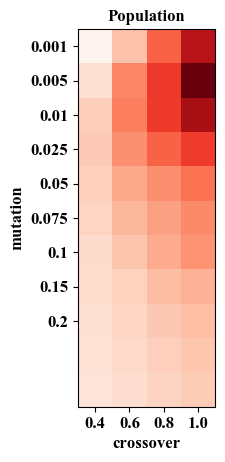

In [62]:
#population

plt.figure(figsize=(weight, height), dpi=density)

maxim_pop = max(db_params['final_pop'])
matrix =[[maxim_pop-np.average(db_params[(cr==db_params['cross']) & (mu == db_params['mut'])]['final_pop'])
          for cr in db_params['cross'].unique()] for mu in db_params['mut'].unique()]


color_map = plt.imshow(matrix)
color_map.set_cmap("Reds_r")
ax = plt.gca()
ax.set_xticks([0,1,2,3])
ax.set_xticklabels(cross_list)
ax.set_yticks([0,1,2,3,4,5,6,7,8])
ax.set_yticklabels(muts_list)

ax.set_ylabel('mutation', fontsize = 12)
ax.set_xlabel('crossover', fontsize = 12)
ax.set_title('Population')

plt.gcf().subplots_adjust(left=0.18)
plt.savefig("./reports/pop_comparison_per_1000_h50_cross_mut_2021.pdf")
# print(matrix)
# print(matrix_pos)

In [63]:
# Important stistics

print("Minimum HV : ", min(db_params['hv']))
print("Maximum HV : ", max(db_params['hv']))
print("Minimum pop : ", min(db_params['final_pop']))
print("Maximum pop : ", max(db_params['final_pop']))
      
db_params.sort_values( by="hv",
                      ascending=False
                     )


Minimum HV :  4.607560409467175
Maximum HV :  5.0085386895042365
Minimum pop :  207
Maximum pop :  13430


,cross,mut,final_pop,hv,sim
280,1.0,0.300,3171,5.008539,10263d27-a805-435a-aa9b-365de43f936f
325,0.8,0.300,2881,5.008250,97a14b56-f0d2-4786-87b4-5447aa4e624c
328,1.0,0.300,2883,5.007690,ab804e19-0ed0-4695-b40c-bf3c1f7ae423
324,0.8,0.250,3142,5.006995,550d624a-6191-44aa-9281-474ab76136e2
256,1.0,0.300,3078,5.006766,67b90298-dd4e-4122-a508-1127b1c8c91b
...,...,...,...,...,...
116,0.6,0.001,1820,4.667323,fecd1ccf-a8c0-4fed-a5a9-b7d985a95e7d
140,0.4,0.001,207,4.651361,eca5f65d-7688-4706-9cfb-ec56f3f68670
108,0.4,0.001,1417,4.649362,f2a62383-d580-466f-babc-aec913e66738
204,0.4,0.001,1106,4.643506,8204b5e4-805f-4922-8fe4-3b700327d290


#### Specific Simulation


In [43]:
# Creating a database and loading from disc, 
# run this cell each time you reopen the jupyter notebook
# TODO test todo

name = 'static_perf_1000_fix_cro_1.0_mut_0.02_key_57561e0'
name = 'static_perf_10000_fix_cro_1.0_mut_0.2_key_6118920'
#name = 'static_perf_30000_h0.9_cro_1.0_mut_0.2_key_cdf0286'

name = 'static_perf_1000_h0.5_cro_1.0_mut_0.25_key_879ecf7'
#name = 'static_perf_1000_h0.5_cro_0.4_mut_0.001_key_f7f5378'
#name =  'static_perf_1000_h0.5_cro_0.4_mut_0.25_key_1100715'
#name ='static_perf_1000_h0.5_cro_1.0_mut_0.001_key_b58d18a'

archive = './data/'+name

try:
    db_sims_pi = pd.read_csv('{}.csv'.format(archive))#.set_index('sim')
except:
    print("Impossible to retrieve {}.cvc".format(archive))
    
#Cleaning dataframe, changing index,changing columns name in case they are wrong
#db_sims_pi.rename(columns= {'Unnamed: 0':'index','cara':'risk_aversion_coefficient'},
#                  inplace=True)
#db_sims_pi.set_index('sim',inplace= True)
db_sims_pi.columns = pe.cols 

#printing head of dataframe,checkingif everything is ok
db_sims_pi.head()

,sim,princ,agent,wage,effort,risk_averse,init_pop,gen,cutoff
0,879ecf74-fddf-4b10-9d6f-708d15f89b03,0.362465,2.636419,2.139879,0.289246,0.5,10,1000,0
1,879ecf74-fddf-4b10-9d6f-708d15f89b03,0.002666,2.873472,2.477386,0.274471,0.5,10,1000,0
2,879ecf74-fddf-4b10-9d6f-708d15f89b03,0.692535,2.405562,1.933405,0.375377,0.5,10,1000,0
3,879ecf74-fddf-4b10-9d6f-708d15f89b03,1.037686,2.147561,1.643220,0.416202,0.5,10,1000,0
4,879ecf74-fddf-4b10-9d6f-708d15f89b03,1.471384,1.795055,1.361385,0.538513,0.5,10,1000,0


[   0   30   80  150  250  450  650  850 1000]


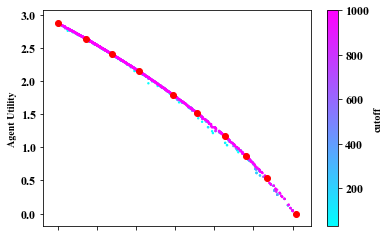

In [44]:
%matplotlib inline 
#notebook
db_sims =db_sims_pi

print(db_sims['cutoff'].unique())
df = db_sims[~(db_sims['cutoff']==0)]
fig = df.plot.scatter(x = 'princ', y = 'agent',
                      c = 'cutoff',
                      colormap ='cool',
                      lw = 1.4,
                      s = 1.0, 
                      alpha = 1)
plt.xlabel("Principal Utility", fontsize=10)
plt.ylabel("Agent Utility", fontsize=10)

#plt.xlim(0,4)
#plt.ylim(0,11)
plt.scatter(db_sims[db_sims['cutoff']==0]['princ'],
            db_sims[db_sims['cutoff']==0]['agent'],
            c = 'red')
plt.gcf().subplots_adjust(bottom=0.15, top = 0.9)

#plt.savefig('./reports/Pareto_Front_cutoffs_'+name+'.pdf')


Text(0.5, 0, 'Salary')

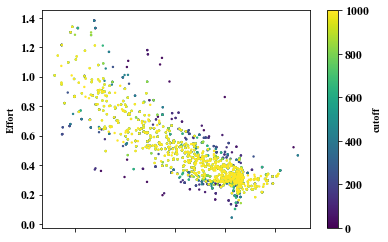

In [45]:
%matplotlib inline 
#notebook
db_sims =db_sims_pi
crras = db_sims['risk_averse'].unique()
df = db_sims[(db_sims['risk_averse']==crras[0])]
fig = df.plot.scatter(x = 'wage', y = 'effort',
                      c = 'cutoff',
                      colormap ='viridis',
                      lw = 1.4,
                      s = 1.0, 
                      alpha = 1)
plt.ylabel("Effort", fontsize=10)
plt.xlabel("Salary", fontsize=10)
#plt.xlim(0,4)
#plt.ylim(0,11)

#plt.savefig('./reports/Salary_effort_cutoffs_'+name+'.pdf')


In [46]:
# Creating a database and loading from disc, 
# run this cell each time you reopen the jupyter notebook

archive = './data/hv_'+name

try:
    db_hv_pi = pd.read_csv('{}.csv'.format(archive))#.set_index('sim')
except:
    print("Impossible to retrieve {}.cvc".format(archive))
    
#Cleaning dataframe, changing index,changing columns name in case they are wrong
db_hv_pi.rename(columns= {'Unnamed: 0':'index','cara':'risk_aversion_coefficient'},
                  inplace=True)
#db_hv_pi.set_index('index',inplace= True)
db_hv_pi.index = db_hv_pi['gen']
#printing head of dataframe,checkingif everything is ok
db_hv_pi.head()


,index,gen,indicator,sim
gen,,,,
0,0,0,4.195105,879ecf74-fddf-4b10-9d6f-708d15f89b03
1,1,1,4.110498,879ecf74-fddf-4b10-9d6f-708d15f89b03
2,2,2,4.088925,879ecf74-fddf-4b10-9d6f-708d15f89b03
3,3,3,4.085146,879ecf74-fddf-4b10-9d6f-708d15f89b03
4,4,4,4.060411,879ecf74-fddf-4b10-9d6f-708d15f89b03


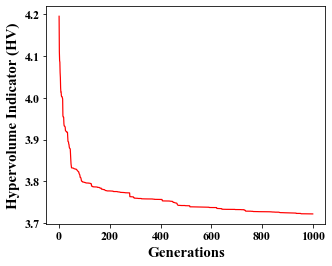

In [47]:
#Hypervolume Indicator

#Assigning variables
generations_hv = db_hv_pi['gen']
hypervolume_ind = db_hv_pi['indicator']

# plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
# plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
# plt.rc('figure', titlesize=MEDIUM_SIZE)  # fontsize of the figure title


plt.figure(figsize=(5, 4))
plt.plot(generations_hv[0:],hypervolume_ind[0:], color ='red', lw=1.2, alpha=1)#,label='risk aversion=0.5')
plt.xlabel("Generations")#,fontsize=10)
plt.ylabel("Hypervolume Indicator (HV)")#,fontsize=10)

#plt.legend()
plt.savefig('./reports/HV_'+name+'.pdf')

plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels



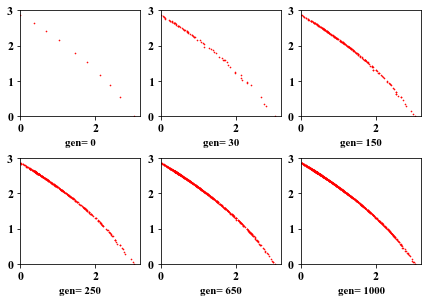

In [48]:
# Convergence 3 x 2

%matplotlib inline 
db_sims =db_sims_pi

plt.figure(figsize=(7, 4))
cutoffs = db_sims['cutoff'].unique()#gens_observations.copy()
cutoffs_6 = [cutoffs[0],cutoffs[1],cutoffs[3],cutoffs[4],cutoffs[6],cutoffs[8]]

hv_ind_obs = [hypervolume_ind[c] for c in cutoffs_6]
crras = db_sims['risk_averse'].unique()
crra= crras[0]
counter = 1
for cut in cutoffs_6:
    plt.subplot(2,3,counter)
    U_ga_temp = db_sims[(db_sims['risk_averse']==crra) & (db_sims['cutoff']==cut)]['princ']
    V_ga_temp = db_sims[(db_sims['risk_averse']==crra) & (db_sims['cutoff']==cut)]['agent']
    plt.scatter(U_ga_temp, V_ga_temp, color ='red', s=0.4, alpha=1)
    plt.xlim(0,3.2) #h = 0.5
    plt.ylim(0,3)   #h = 0.5 
    #plt.xlim(0,4.1)   #h = 0.9
    #plt.ylim(0,11.5)   #h = 0.9
    hv =  "%.4f" % hv_ind_obs[counter-1]
    label = "gen= "+str(cut)#+", hv= "+str(hv)
    plt.xlabel(label,fontsize = 11)
    #plt.xticks(np.arange(0, 3.5, step=1))  # Set label locations.
    counter+=1
    
#changing space between plots
plt.subplots_adjust(bottom=0.1, right=0.92, top=0.98,wspace = 0.17, hspace=0.4)

plt.savefig('./reports/convergence_3x2_'+name+'.pdf')

plt.show()

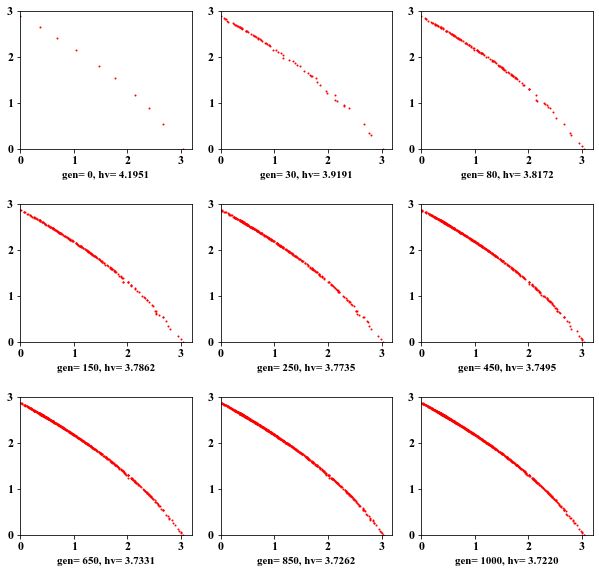

In [49]:
# Convergence 3x3

%matplotlib inline 
db_sims =db_sims_pi

plt.figure(figsize=(10, 8))
cutoffs = db_sims_pi['cutoff'].unique() #gens_observations.copy()

hv_ind_obs = [hypervolume_ind[c] for c in cutoffs]
crra=crras[0]
counter = 1
for cut in cutoffs:
    plt.subplot(3,3,counter)
    U_ga_temp = db_sims[(db_sims['risk_averse']==crra) & (db_sims['cutoff']==cut)]['princ']
    V_ga_temp = db_sims[(db_sims['risk_averse']==crra) & (db_sims['cutoff']==cut)]['agent']
    plt.scatter(U_ga_temp, V_ga_temp, color ='red', s=1.0, alpha=1)
    plt.xlim(0,3.2) # h =0.5
    plt.ylim(0,3)
    #plt.xlim(0,4.1)   #h = 0.9
    #plt.ylim(0,11.5)   #h = 0.9
    hv =  "%.4f" % hv_ind_obs[counter-1]
    label = "gen= "+str(cut)+", hv= "+str(hv)
    plt.xlabel(label,fontsize = 11)
    counter+=1
    
#changing space between plots
plt.subplots_adjust(bottom=0.07, right=0.92, top=0.98,wspace = 0.17, hspace=0.4)
plt.savefig('./reports/convergence_3x3_'+name+'.pdf')


plt.show()

## Imperfect Information

### Parameters, Variables and Methods

In [ ]:
import src.imperfectga as im

### Simulation

#### By risk aversion

In [ ]:
#list of cara values to simulate with current parameters
risk_averse_list = [0.8]
#risk_averse_list = [ 0.10, 0.30, 0.50, 0.70, 0.90]


# params
im.max_gen = 1000
im.init_pop_random = True
im.init_pop_size = 15

# code for extracting an old simulation to use as seed
name_seed = 'static_imp_1000_fix_cro_0.6_mut_0.05_key_95bca20'
data = pd.read_csv('./data/{}.csv'.format(name_seed))
data = data[['wl', 'wh']]
seeds = data.to_numpy().tolist()# code for extracting an old 

# arguments from simulate
args = []

### simulating for each element of risk_averse_list
for cara in risk_averse_list:
    # setting variables for current simulation
    im.h = cara
    # reset seeding
    im.reset_seeding(fix_imp)
    # reinit database and variables
    im.reinit_variables_imp(cara)

    db_sims, args, df_hyp= im.simulate_imp()

    

In [ ]:
db_sims.head()

#### By crossover and Mutation

In [ ]:
# Simulations per crossover and mutation

# list of crossover indexes
cross_list = [0.4,0.6,0.8,1.0]
cross_list = [0.4,0.6]

# list of mutation indexes
muts_list = [0.01,0.05,0.1,0.15,0.2]
muts_list = [0.01,0.05]
# setting parameters
im.max_gen =1000
im.init_pop_random = False
# assign risk averse coefficient
im.h = 0.5

# arguments from simulate
args = []
         
# data frame of crossover and mutations
name_cr_mu_df = 'static_imp_cross_mut_rd_pop_'+str(im.max_gen)+'_h'+str(im.h)+'_9jul'
cols_cr_mut = ['sim','cross', 'mut', 'final_pop','hv']
db_cr_mut = pd.DataFrame([], columns = cols_cr_mut ).set_index('sim') 
         

In [ ]:
# loop over crossover and mutation indexes
for cr in cross_list:
    for mu in muts_list:
        # assigning values to global variables of crossover and mutation
        im.crossover = cr
        im.mutation = mu
        
        print("***************new simulation******************")
        print("*****","crossover: ", im.crossover,"mutation: ",im.mutation,"*****")
        print("***************new simulation******************")
        
        # setting variables for current simulation
        # reset seeding
        im.reset_seeding(fix_imp)
        # reinit database and variables
        im.reinit_variables_imp()
        
        # simulate
        db_sims, args, df_hyp= im.simulate_imp()
         
        #adding result of simulation to cross and mut data frame
        hv_ = df_hyp['indicator'].loc[max(df_hyp.index)]
        final_pop_ = len(db_sims[db_sims['gen']== im.max_gen])
        new_row = {'sim':db_sims.index[0], 'cross':cr, 'mut':mu, 'final_pop':final_pop_,'hv': hv_}
        #append row to the dataframe
        db_cr_mut = db_cr_mut.append(new_row, ignore_index=True)
         
         # saving database of crossover and mutation
        db_cr_mut.to_csv('./data/{}.csv'.format(name_cr_mu_df))
         
         

In [ ]:
db_cr_mut

#### By initial Points

In [ ]:
# Simulations by initial points, same crossover and mutation, same risk averse coefficient

# number of simulations
tot_sim = 2

# setting parameters
im.crossover = 1
im.mutation = 0.2
im.max_gen =1000
# im.max_gen =10000
im.init_pop_size = 50
im.init_pop_random = True

# assign risk averse coefficient
im.h = 0.5
# arguments from simulate
args = []
         
# data frame of crossover and mutations
name_cr_mu_df ='static_imp_cross_'+str(im.crossover)+'_mut_'+str(im.mutation)+'_pop_'+str(im.max_gen)+'_h'+str(im.h)+'_9jul'
cols_cr_mut = ['sim','cross', 'mut', 'final_pop','hv']
db_cr_mut = pd.DataFrame([], columns = cols_cr_mut ).set_index('sim') 

In [ ]:


# loop over number of simulations
for x in range(tot_sim):        
    print("***************new simulation******************")

    # setting variables for current simulation
    # reset seeding
    im.reset_seeding(fix_imp)
    # reinit database and variables
    im.reinit_variables_imp(im.h)

    # simulate
    db_sims, args, df_hyp= im.simulate_imp()

    #adding result of simulation to cross and mut data frame
    hv_ = df_hyp['indicator'].loc[max(df_hyp.index)]
    final_pop_ = len(db_sims[db_sims['gen']==im.max_gen])
    new_row = {'sim':db_sims.index[0], 'cross':im.crossover, 'mut':im.mutation,
               'final_pop':final_pop_,'hv': hv_}
    #append row to the dataframe
    db_cr_mut = db_cr_mut.append(new_row, ignore_index=True)

     # saving database of crossover and mutation
    db_cr_mut.to_csv('./data/{}.csv'.format(name_cr_mu_df))
         

In [ ]:
db_cr_mut

### Ploting

#### Parameters

In [ ]:
# Creating a database and loading from disc, 
# run this cell each time you reopen the jupyter notebook


name_params = 'static_imp_cross_mut_'+str(10000)+'_h50_27_jun'
try:
    db_params = pd.read_csv('./data/{}.csv'.format(name_params)).set_index('sim')
except:
    print("Impossible to retrieve {}.cvc".format(name_params))

    
#Cleaning dataframe, changing index,changing columns name in case they are wrong
#db_sims_pi.rename(columns= {'Unnamed: 0':'sim','cara':'risk_aversion_coefficient'},inplace=True)
#db_sims.set_index('sim',inplace= True)
db_params.drop(columns=['Unnamed: 0'],inplace=True)
#printing head of dataframe,checkingif everything is ok
db_params.head()

In [ ]:
# Significant points

print("Minimum HV : ", min(db_params['hv']))
print("Maximum HV : ", max(db_params['hv']))
print("Minimum pop : ", min(db_params['final_pop']))
print("Maximum pop : ", max(db_params['final_pop']))


print(db_params[db_params['hv'] == max(db_params['hv'])])
      

In [ ]:
# Ploting hv color map 

% matplotlib inline

weight = 4
height = 5
density = 100

plt.figure(figsize=(weight, height), dpi=density)


matrix_pos =[[(str(cr)+" "+str(mu)) for cr in db_params['cross'].unique()] for mu in db_params['mut'].unique()]
maxim_hv = max(db_params['hv'])
matrix =[[maxim_hv-np.average(db_params[(cr==db_params['cross']) & (mu == db_params['mut'])]['hv'])
          for cr in db_params['cross'].unique()] for mu in db_params['mut'].unique()]


color_map = plt.imshow(matrix)
color_map.set_cmap("Blues_r")
ax = plt.gca()
ax.set_xticks([0,1,2,3])
ax.set_xticklabels(cross_list)
ax.set_yticks([0,1,2,3,4])
ax.set_yticklabels(muts_list)

ax.set_ylabel('mutation', fontsize = 12)
ax.set_xlabel('crossover', fontsize = 12)
ax.set_title('Hypervolume Index')

plt.gcf().subplots_adjust(left=0.18)

plt.savefig("./reports/hv_"+name_params+".pdf")


In [ ]:
# Ploting population color map 

plt.figure(figsize=(weight, height), dpi=density)

maxim_pop = max(db_params['final_pop'])
matrix =[[maxim_hv-np.average(db_params[(cr==db_params['cross']) & (mu == db_params['mut'])]['final_pop'])
          for cr in db_params['cross'].unique()] for mu in db_params['mut'].unique()]


color_map = plt.imshow(matrix)
color_map.set_cmap("Blues_r")
ax = plt.gca()
ax.set_xticks([0,1,2,3])
ax.set_xticklabels(cross_list)
ax.set_yticks([0,1,2,3,4])
ax.set_yticklabels(muts_list)

ax.set_ylabel('mutation', fontsize = 12)
ax.set_xlabel('crossover', fontsize = 12)
ax.set_title('Population')

plt.gcf().subplots_adjust(left=0.18)
plt.savefig("./reports/pop_comparison_imp_10000_h50_cross_mut.pdf")
# print(matrix)
# print(matrix_pos)

#### Specific simulation

In [ ]:
# Creating a database and loading from disc, 
# run this cell each time you reopen the jupyter notebook


name = 'static_imp_1000_fix_cro_1_mut_0.2_key_82f94a1'

name = 'static_imp_1000_fix_cro_0.6_mut_0.05_key_95bca20'
name = 'static_imp_10000_fix_cro_0.6_mut_0.05_key_f5e6752'
name = 'static_imp_10000_fix_cro_0.8_mut_0.1_key_f97ca99'
name = 'static_imp_10000_fix_cro_1.0_mut_0.02_key_f93dcf5' #No es buena
name = 'static_imp_10000_fix_cro_1.0_mut_0.2_key_6c27125'
# name = 'static_imp_1000_fix_cro_1.0_mut_0.02_key_b8305dd'
archive = './data/'+name
try:
    db_sims_ii = pd.read_csv('{}.csv'.format(archive)).set_index('sim')
except:
    print("Impossible to retrieve {}.cvc".format(archive))
    
#Cleaning dataframe, changing index,changing columns name in case they are wrong
#db_sims_ii.rename(columns= {'Unnamed: 0':'sim','cara':'risk_aversion_coefficient'},inplace=True)
#db_sims.set_index('sim',inplace= True)
#printing head of dataframe,checkingif everything is ok
db_sims_ii.head()

In [ ]:
db_sims= db_sims_ii

crras = db_sims['risk_averse'].unique()
df = db_sims[(db_sims['risk_averse']==0.5) & ~(db_sims['cutoff']==0)]
fig = df.plot.scatter(x = 'princ', y = 'agent',
                      c = 'cutoff',
                      colormap ='cool',
                      lw = 1.4,
                      s = 1.0, 
                      alpha = 1)
plt.ylabel("Agent Utility", fontsize=10)
plt.xlabel("Principal Utility", fontsize=10);
#plt.xlim(0,4)
#plt.ylim(0,11)
plt.scatter(db_sims[db_sims['cutoff']==0]['princ'],
            db_sims[db_sims['cutoff']==0]['agent'],
            c = 'red')
plt.gcf().subplots_adjust(bottom=0.15, top = 0.9)

#plt.savefig('./reports/Pareto_Front_cutoffs_imp_'+name+'.pdf')


In [ ]:
%matplotlib inline
#notebook
db_sims =db_sims_ii
#print(db_sims['cutoff'].unique())
df = db_sims[(db_sims['risk_averse']==0.5) & ~(db_sims['cutoff']==0)]
fig = df.plot.scatter(x = 'wl', y = 'wh',
                      c = 'cutoff',
                      colormap ='viridis',
                      lw = 1.4,
                      s = 1.0, 
                      alpha = 1)
plt.scatter(db_sims[db_sims['cutoff']==0]['wl'],
            db_sims[db_sims['cutoff']==0]['wh'],
            c = 'red')
plt.ylabel("High Wage", fontsize=10)
plt.xlabel("Low Wage", fontsize=10);
#plt.xlim(0,4)
#plt.ylim(0,11)


#plt.savefig('./reports/Salary_AgentUt_imp_cutoffs_'+name+'.pdf')


In [ ]:
# Creating a database and loading from disc, 
# run this cell each time you reopen the jupyter notebook

archive = './data/hv_'+name

#'./data_static/hv_static_perf_10000_fix_cro_0.8_mut_0.1_key_a79cf27'
try:
    db_hv_ii = pd.read_csv('{}.csv'.format(archive))#.set_index('sim')
except:
    print("Impossible to retrieve {}.cvc".format(archive))
    print("Creating new database named {}.cvc".format(archive))
    
#Cleaning dataframe, changing index,changing columns name in case they are wrong
db_hv_ii.rename(columns= {'Unnamed: 0':'index','cara':'risk_aversion_coefficient'},
                  inplace=True)
db_hv_ii.set_index('index',inplace= True)
db_hv_ii.index = db_hv_ii['gen']
#printing head of dataframe,checkingif everything is ok
db_hv_ii.head()

In [ ]:
#Hypervolume Indicator

#Assigning variables
generations_hv = db_hv_ii['gen']
hypervolume_ind = db_hv_ii['indicator']

# plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
# plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
# plt.rc('figure', titlesize=MEDIUM_SIZE)  # fontsize of the figure title


plt.figure(figsize=(5, 4))
plt.plot(generations_hv[0:],hypervolume_ind[0:], color ='blue', lw=1.2, alpha=1)#,label='risk aversion=0.5')
plt.xlabel("Generations")#,fontsize=10)
plt.ylabel("Hypervolume Indicator (HV)")#,fontsize=10)
#plt.legend()
#plt.savefig('Per_Inf_HV_h50'+name+'.pdf')
#Hypervolume Indicator
#plt.plot(generations_hv[1:],hypervolume_ind_n[1:], color = 'blue', lw=1.0, alpha=1)#,label='risk aversion=0.5')

#plt.legend()
plt.savefig('./reports/HV_'+name+'.pdf')

plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels




In [ ]:
# Convergence 3 x 2

%matplotlib inline 
db_sims = db_sims_ii

plt.figure(figsize=(7, 4))

cutoffs = db_sims_ii['cutoff'].unique()#gens_observations.copy()
cutoffs_6 = [cutoffs[0],cutoffs[1],cutoffs[3],cutoffs[4],cutoffs[6],cutoffs[8]]

#cutoffs.pop(10)
# print(name)
print(cutoffs_6)
# print(hypervolume_ind)
hv_ind_obs = [hypervolume_ind[c] for c in cutoffs_6]
crra=0.5
counter = 1
for cut in cutoffs_6:
    plt.subplot(2,3,counter)
    U_ga_temp = db_sims[(db_sims['risk_averse']==crra) & (db_sims['cutoff']==cut)]['princ']
    V_ga_temp = db_sims[(db_sims['risk_averse']==crra) & (db_sims['cutoff']==cut)]['agent']
    plt.scatter(U_ga_temp, V_ga_temp, color ='blue', s=0.4, alpha=1)
    plt.xlim(0,3.2)
    plt.ylim(0,3)
    hv =  "%.4f" % hv_ind_obs[counter-1]
    label = "gen= "+str(cut)#+", hv= "+str(hv)
    plt.xlabel(label,fontsize = 11)

    plt.xticks(np.arange(0, 3.5, step=1))  # Set label locations.

    counter+=1
    
#changing space between plots
plt.subplots_adjust(bottom=0.17, right=0.92, top=0.98,wspace = 0.17, hspace=0.4)
plt.savefig('./reports/convergence_3x2_'+'static_imp'+'.pdf')
#plt.savefig('MultiObj_Model_Perfect_InformationReserve.eps')

plt.show()

In [ ]:
plt.figure(figsize=(10, 8))
db_sims = db_sims_ii
cutoffs = db_sims_ii['cutoff'].unique()#gens_observations.copy()
#cutoffs.pop(10)
# print(name)
# print(cutoffs)
# print(hypervolume_ind)
hv_ind_obs = [hypervolume_ind[c] for c in cutoffs]
crra=0.5
counter = 1
for cut in cutoffs:
    plt.subplot(3,3,counter)
    U_ga_temp = db_sims[(db_sims['risk_averse']==crra) & (db_sims['cutoff']==cut)]['princ']
    V_ga_temp = db_sims[(db_sims['risk_averse']==crra) & (db_sims['cutoff']==cut)]['agent']
    plt.scatter(U_ga_temp, V_ga_temp, color ='blue', s=1.0, alpha=1)
    plt.xlim(0,3.2)
    plt.ylim(0,3)
    hv =  "%.4f" % hv_ind_obs[counter-1]
    label = "gen= "+str(cut)+", hv= "+str(hv)
    plt.xlabel(label,fontsize = 11)
    counter+=1
    
#changing space between plots
plt.subplots_adjust(bottom=0.07, right=0.92, top=0.98,wspace = 0.17, hspace=0.4)

plt.savefig('./reports/convergence_3x3_'+name+'.pdf')

plt.show()

## Ploting Both Models

In [ ]:
# Creating a database and loading from disc

name_pi = 'static_perf_10000_fix_cro_1_mut_0.2_key_824fb02'
name_ii = 'static_imp_10000_fix_cro_1.0_mut_0.2_key_6c27125'


archive_pi = './data/'+name_pi
archive_ii = './data/'+name_ii

archive_pi = name_pi
archive_ii = name_ii

try:
    db_sims_pi = pd.read_csv('{}.csv'.format(archive_pi))#.set_index('sim')
except:
    print("Impossible to retrieve {}.cvc".format(archive_pi))
    
try:
    db_sims_ii = pd.read_csv('{}.csv'.format(archive_ii))#.set_index('sim')
except:
    print("Impossible to retrieve {}.cvc".format(archive_ii))
    
#Cleaning dataframe, changing index,changing columns name in case they are wrong
#db_sims_pi.rename(columns= {'Unnamed: 0':'index','cara':'risk_aversion_coefficient'},
#                  inplace=True)
#db_sims_pi.set_index('index',inplace= True)
#printing head of dataframe,checkingif everything is ok
db_sims_pi.columns = pe.cols 
db_sims_ii.columns = im.cols 

db_sims_pi.head()

In [ ]:
#Frontiers Perfect Information vs Frontier Imperfect Information (Genetic Algorithm)
U_ga_pi = db_sims_pi[(db_sims_pi['risk_averse']==0.5) & (db_sims_pi['cutoff']==10000)]['princ']
V_ga_pi = db_sims_pi[(db_sims_pi['risk_averse']==0.5) & (db_sims_pi['cutoff']==10000)]['agent']
U_ga_ii = db_sims_ii[(db_sims_ii['risk_averse']==0.5) & (db_sims_ii['cutoff']==10000)]['princ']
V_ga_ii = db_sims_ii[(db_sims_ii['risk_averse']==0.5) & (db_sims_ii['cutoff']==10000)]['agent']

In [ ]:
# colors
dark_red ='#67000d'
dark_blue ='#08306b'
blue_cara5 = '#66abd4'
red_cara5 = '#fa6849'


# creating figure
plt.figure()#figsize=(8, 4))
plt.scatter(U_ga_pi, V_ga_pi, color ='red', s=0.6,label='FB Frontier')
plt.scatter(U_ga_ii, V_ga_ii, color ='blue', s=0.6,label='SB Frontier')
plt.xlabel("Principal Utility",fontsize=10)
plt.ylabel("Agent Utility",fontsize=10)
plt.xlim(0, 3.1)
plt.ylim(0, 2.9)
plt.legend()
plt.savefig('./reports/Imp_Inf_vs_Per_GA_h50_frontier_all.pdf')
